In [1]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen,Request

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd

In [3]:
url ="https://www.iexindia.com/marketdata/areaprice.aspx"             

payload = {'ct100$InnerContent$ddlInterval':'1',
        'ct100$InnerContent$ddlPeriod':'-7',
        'ctl00$InnerContent$btnUpdateReport':'Update Report'
          }


In [4]:
r = requests.post(url,data=payload,headers={'User-Agent': 'Mozilla/5.0'})          # scrapping web page

In [5]:
h=bs(r.text, "html.parser")                 # formatting data into html format 
h


<!DOCTYPE html>

<html xmlns="http://www.w3.org/1999/xhtml">
<head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><title>
	Area Prices | Indian Energy Exchange Ltd
</title><meta content="IEX, IEX India, Indian Energy Exchange Limited" name="Keywords"/><meta content="Indian Energy Exchange Limited (IEX) is India's power trading platform . IEX enables efficient price discovery and offers participants the opportunity to trade in a variety of energy products. Our exchange platform increases the accessibility and transparency of the power market in India and enhances the speed and efficiency of trade execution." name="Description"/><link href="/image/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/image/favicon.ico" rel="icon" type="image/ico"/>
<!-- Bootstrap -->
<link href="/css/bootstrap.min.css" rel="stylesheet"/><link href="/css/style.css" media="screen" rel="styleshee

In [6]:
tables = pd.read_html(r.text,index_col=0)               # getting data as dataframe
data = tables[12]
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Date | Hour | Time Block,Date | Hour | Time Block,Date | Hour | Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
NaN,23-11-2020,1,00:00 - 00:15,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72
NaN,23-11-2020,1,00:15 - 00:30,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14
NaN,23-11-2020,1,00:30 - 00:45,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05


In [7]:
columns = ['Date', 'Hour', 'Time Block', 'A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1', 'S2', 'S3', 'W1', 'W2', 'W3', 'MCP']
data.columns = columns

In [8]:
data.reset_index(drop=True,inplace=True)        # resetting index of dataframe...


In [9]:
df = data.iloc[2:]
df.reset_index(drop=True,inplace=True)
df.head()

,Date,Hour,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,23-11-2020,1,00:00 - 00:15,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72,2399.72
1,23-11-2020,1,00:15 - 00:30,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14,2399.14
2,23-11-2020,1,00:30 - 00:45,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05,2399.05
3,23-11-2020,1,00:45 - 01:00,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55,2378.55
4,23-11-2020,2,01:00 - 01:15,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33,2378.33


In [10]:
columns = ['Hour','A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3','S1', 'S2', 'S3', 'W1', 'W2', 'W3', 'MCP']
for column in columns:          # as data is in string form so converting into desired format
    
    df[column] = pd.to_numeric(df[column], errors='coerce')


c:\users\pawan kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
col = ['A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3','S1', 'S2', 'S3', 'W1', 'W2', 'W3', 'MCP']      
for c in col:
    df[c+'m_avg'] = df.loc[:,c].rolling(window=3).mean()              # calculating moving average...


c:\users\pawan kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df.describe()

,Hour,A1,A2,E1,E2,N1,N2,N3,S1,S2,...,N1m_avg,N2m_avg,N3m_avg,S1m_avg,S2m_avg,S3m_avg,W1m_avg,W2m_avg,W3m_avg,MCPm_avg
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,12.500000,2894.083125,2894.083125,2894.083125,2894.083125,2894.083125,2894.083125,2894.083125,2894.083125,2894.083125,...,2904.544894,2904.544894,2904.544894,2904.544894,2904.544894,2904.544894,2904.544894,2904.544894,2904.544894,2904.544894
std,6.958524,513.231695,513.231695,513.231695,513.231695,513.231695,513.231695,513.231695,513.231695,513.231695,...,499.322611,499.322611,499.322611,499.322611,499.322611,499.322611,499.322611,499.322611,499.322611,499.322611
min,1.000000,2063.640000,2063.640000,2063.640000,2063.640000,2063.640000,2063.640000,2063.640000,2063.640000,2063.640000,...,2126.226667,2126.226667,2126.226667,2126.226667,2126.226667,2126.226667,2126.226667,2126.226667,2126.226667,2126.226667
25%,6.750000,2399.575000,2399.575000,2399.575000,2399.575000,2399.575000,2399.575000,2399.575000,2399.575000,2399.575000,...,2412.526667,2412.526667,2412.526667,2412.526667,2412.526667,2412.526667,2412.526667,2412.526667,2412.526667,2412.526667
50%,12.500000,2799.040000,2799.040000,2799.040000,2799.040000,2799.040000,2799.040000,2799.040000,2799.040000,2799.040000,...,2863.713333,2863.713333,2863.713333,2863.713333,2863.713333,2863.713333,2863.713333,2863.713333,2863.713333,2863.713333
75%,18.250000,3199.637500,3199.637500,3199.637500,3199.637500,3199.637500,3199.637500,3199.637500,3199.637500,3199.637500,...,3269.702500,3269.702500,3269.702500,3269.702500,3269.702500,3269.702500,3269.702500,3269.702500,3269.702500,3269.702500
max,24.000000,4324.670000,4324.670000,4324.670000,4324.670000,4324.670000,4324.670000,4324.670000,4324.670000,4324.670000,...,4044.983333,4044.983333,4044.983333,4044.983333,4044.983333,4044.983333,4044.983333,4044.983333,4044.983333,4044.983333


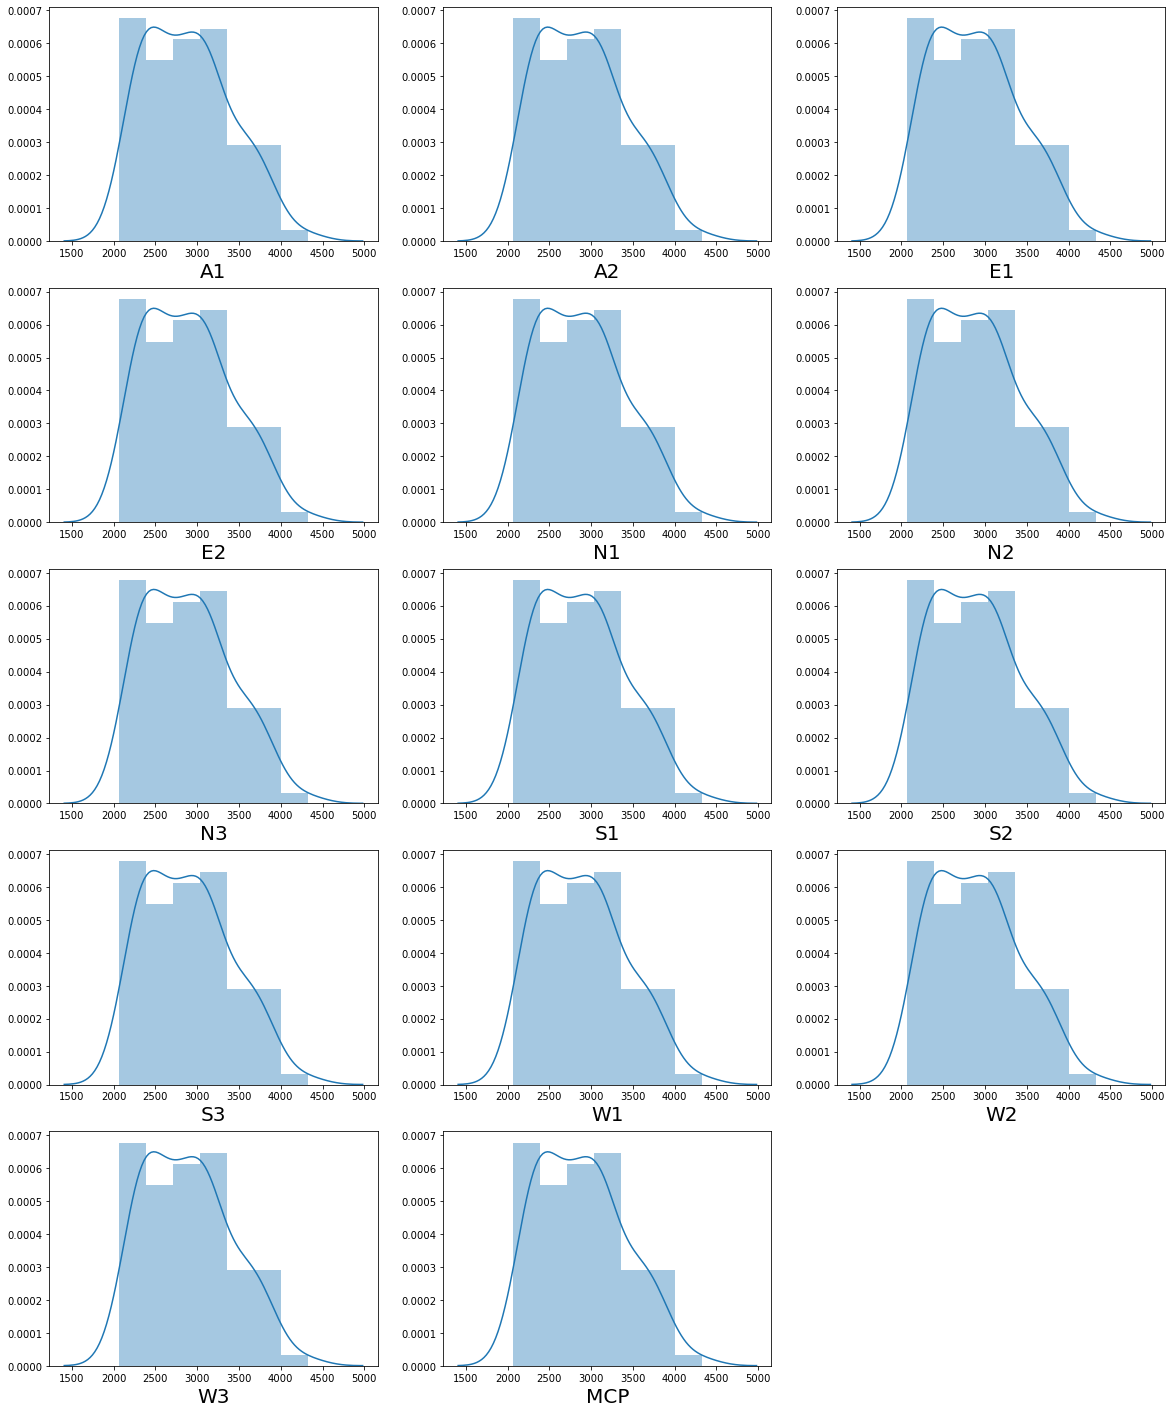

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for c in col:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

c:\users\pawan kumar\appdata\local\programs\python\python37\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


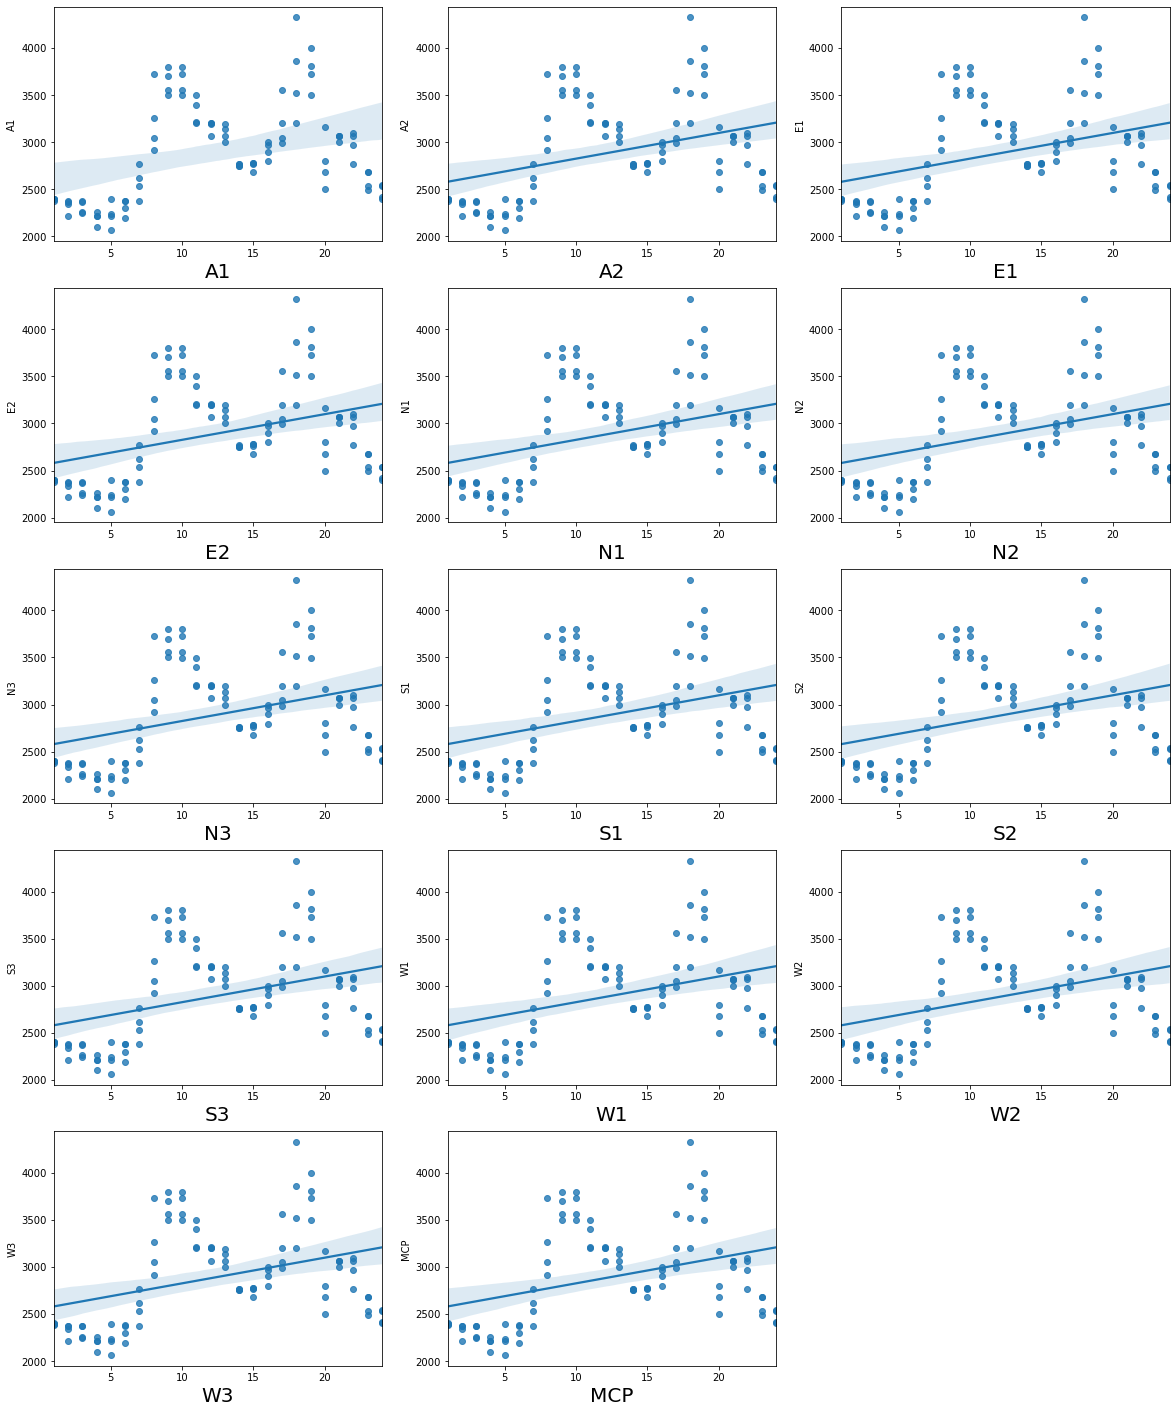

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for c in col:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.regplot(x = df['Hour'],y = df[c])
        plt.xlabel(c,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
m_avg=['A1m_avg', 'A2m_avg','E1m_avg', 'E2m_avg', 'N1m_avg', 'N2m_avg', 'N3m_avg', 'S1m_avg',
       'S2m_avg', 'S3m_avg', 'W1m_avg', 'W2m_avg', 'W3m_avg', 'MCPm_avg']

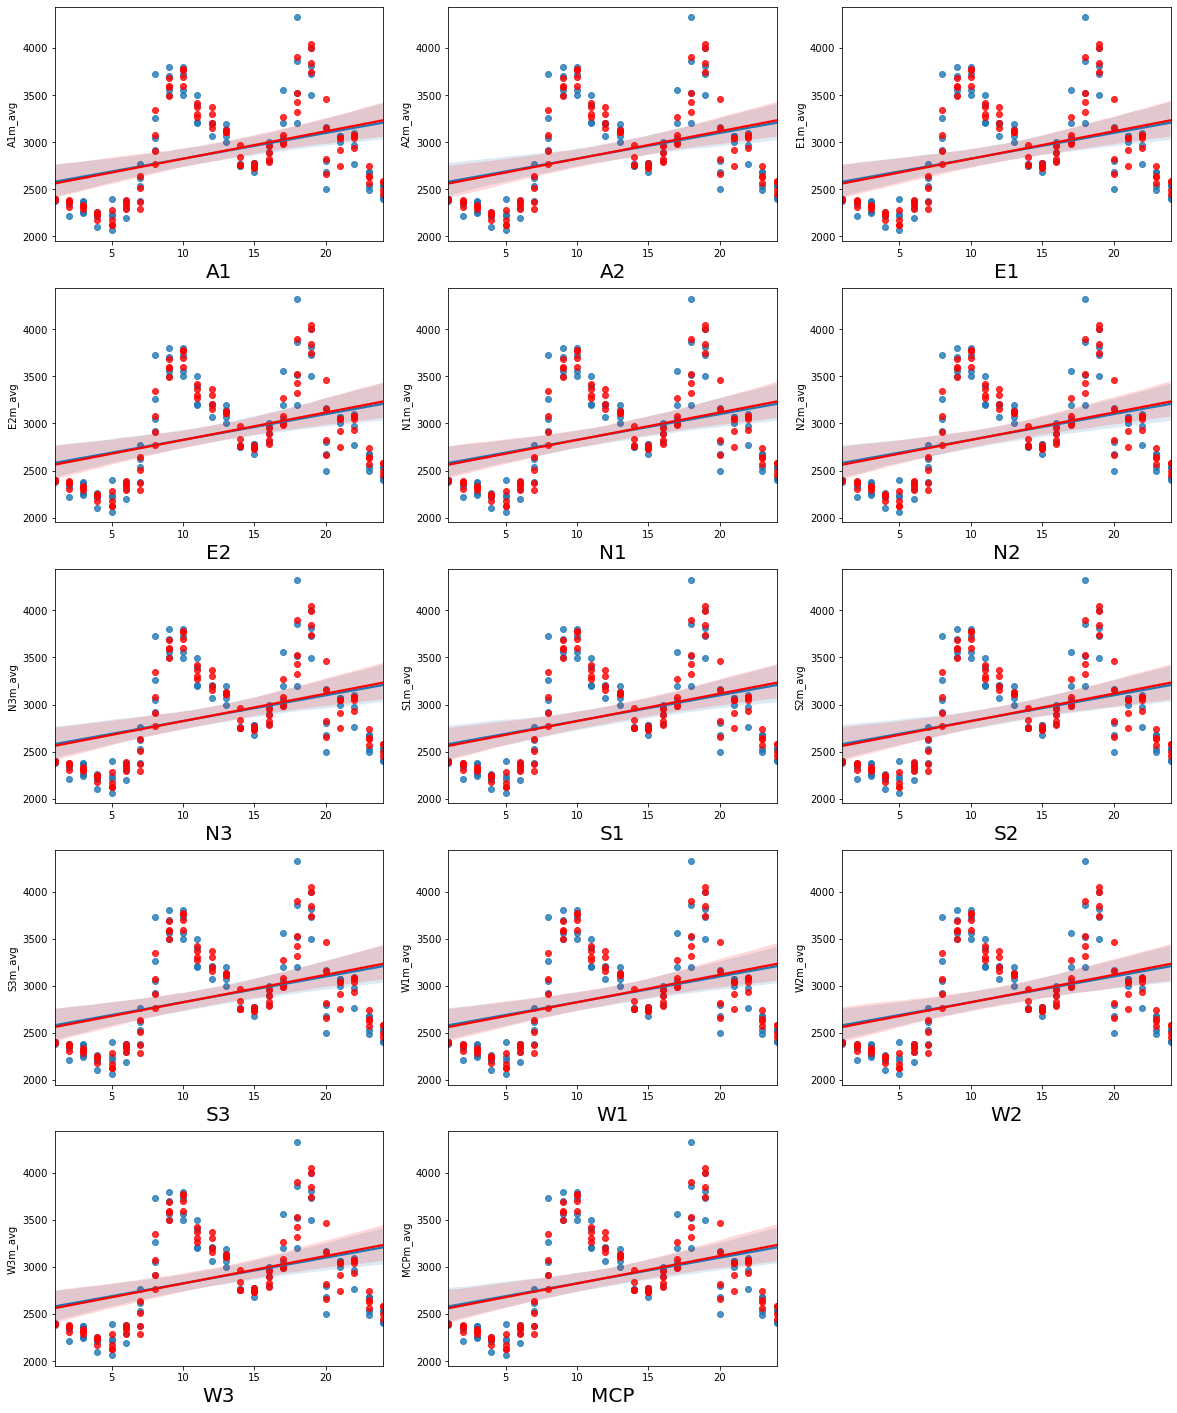

In [17]:
plt.figure(figsize=(20,25), facecolor='white')             # plot with moving average...
plotnumber = 1 

for c,m in zip(col,m_avg):
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.regplot(x = df['Hour'],y = df[c])
        sns.regplot(x = df['Hour'],y = df[m],color='red')
        plt.xlabel(c,fontsize=20)
        
    plotnumber+=1
plt.show()